<a href="https://colab.research.google.com/github/akashdeepo/akashdeepo.github.io/blob/main/TraderPy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
# Description- LSTM long short term memory used to predict closing stock price of SPY.

In [3]:
# Import Libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

#iter 2

import datetime as dt
from pandas_datareader import data as pdr
import yfinance as yfin
yfin.pdr_override()


In [15]:
end=dt.datetime.now()
start= dt.datetime(2016,1,1)
start,end

(datetime.datetime(2016, 1, 1, 0, 0),
 datetime.datetime(2022, 5, 22, 3, 0, 30, 365380))

In [59]:
stocks=['TSLA']

In [60]:
# getting Stock Quote
df = pdr.get_data_yahoo(stocks,start,end)
#show data
print (df)

[*********************100%***********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2016-01-04   46.144001   46.276001   43.799999   44.681999   44.681999   
2016-01-05   45.271999   45.377998   44.000000   44.686001   44.686001   
2016-01-06   44.000000   44.009998   43.195999   43.807999   43.807999   
2016-01-07   42.838001   43.688000   42.734001   43.130001   43.130001   
2016-01-08   43.571999   44.088001   42.153999   42.200001   42.200001   
...                ...         ...         ...         ...         ...   
2022-05-16  767.159973  769.760010  719.090027  724.369995  724.369995   
2022-05-17  747.359985  764.479980  728.849976  761.609985  761.609985   
2022-05-18  744.520020  760.500000  700.809998  709.809998  709.809998   
2022-05-19  707.000000  734.000000  694.109985  709.419983  709.419983   
2022-05-20  713.989990  721.580017  633.000

In [61]:
#Get number of rows and columns in dataset
df.shape

(1608, 6)

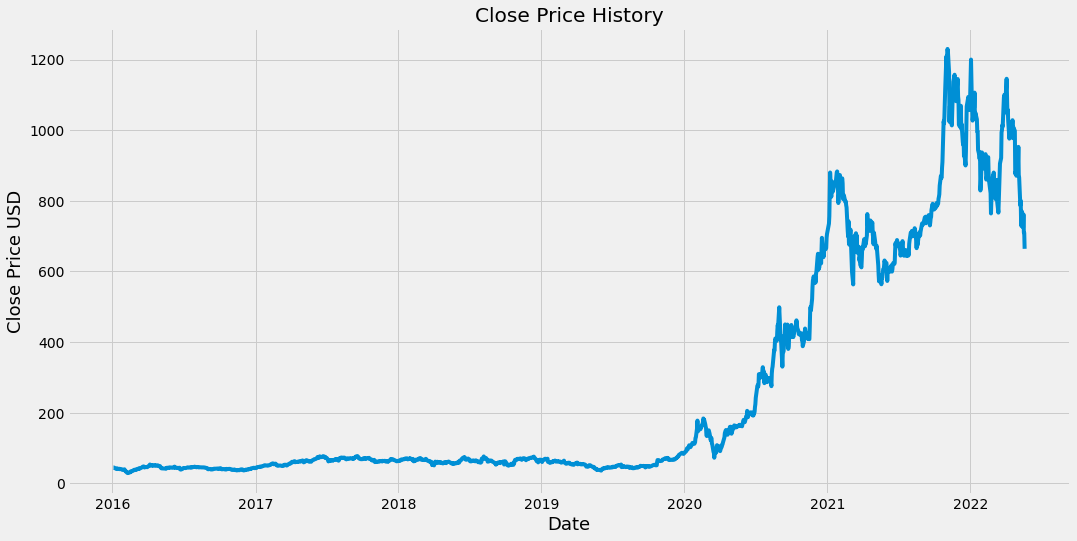

In [62]:
#visualise closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD', fontsize=18)
plt.show()

In [63]:
#Create a new data frame with only 'Close' Column
data=df.filter(['Close'])
# COnvert data frame to numpy array
dataset= data.values
#Get number of rows to train LSTM
training_data_len= math.ceil(len(dataset)*.8)
training_data_len

1287

In [64]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.01327699],
       [0.01328032],
       [0.01254937],
       ...,
       [0.56700765],
       [0.56668295],
       [0.52878679]])

In [65]:
#Create training dataset
#Create scaled training dataset
train_data= scaled_data[0:training_data_len,:]
#Split the data into x_train and y_train datasets
x_train=[]
y_train=[]

for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i<=61:
    print(x_train)
    print(y_train)
    print()

[array([0.01327699, 0.01328032, 0.01254937, 0.01198492, 0.01121068,
       0.01068619, 0.01103918, 0.00943076, 0.01040813, 0.01021   ,
       0.01016504, 0.00916269, 0.00937415, 0.00980372, 0.0087764 ,
       0.00830686, 0.00739275, 0.00766416, 0.00791391, 0.00886964,
       0.00651195, 0.00496347, 0.0052715 , 0.00315191, 0.0007193 ,
       0.00076259, 0.        , 0.00113222, 0.00122713, 0.00191479,
       0.00416425, 0.00384623, 0.0038146 , 0.00567277, 0.00558453,
       0.00588257, 0.00728619, 0.00777072, 0.00803546, 0.00710637,
       0.00743771, 0.00866984, 0.00955231, 0.01025994, 0.00981205,
       0.01083105, 0.01024163, 0.01062792, 0.01190167, 0.01243282,
       0.01303056, 0.0137715 , 0.01483047, 0.01575956, 0.01508022,
       0.01313879, 0.01399961, 0.01441754, 0.01439589, 0.01385642])]
[0.014335949779747097]

[array([0.01327699, 0.01328032, 0.01254937, 0.01198492, 0.01121068,
       0.01068619, 0.01103918, 0.00943076, 0.01040813, 0.01021   ,
       0.01016504, 0.00916269, 0.0

In [66]:
#convert the x_train and y_train to numpy arrays
x_train,y_train= np.array(x_train),np.array(y_train)

In [67]:
#reshape data
x_train= np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1227, 60, 1)

In [68]:
#Building the LSTM model
model= Sequential()
model.add(LSTM(50,return_sequences=True, input_shape= (x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [69]:
#compiling model
model.compile(optimizer='adam',loss='mean_squared_error')

In [70]:
#train the model
model.fit(x_train,y_train, batch_size=1, epochs=1)

1227/1227 [==============================] - 38s 28ms/step - loss: 9.1418e-04


In [71]:
#Create the testing data set
#create a new array containing scaled values from index 1227 to 2003
test_data= scaled_data[training_data_len-60: , :]
#Create datasets x_test and y_test
x_test=[]
y_test= dataset[training_data_len:, :]
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])
  

In [72]:
#Convert data to numpy array
x_test=np.array(x_test)


In [73]:
#reshape data from 2d-3d
x_test= np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [74]:
# Get the models predictions
predictions=model.predict(x_test)
predictions= scaler.inverse_transform(predictions)

In [75]:
#Get the RMS error to evaluate model
rmse= np.sqrt(np.mean(predictions-y_test)**2)
rmse

123.95702383451372

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


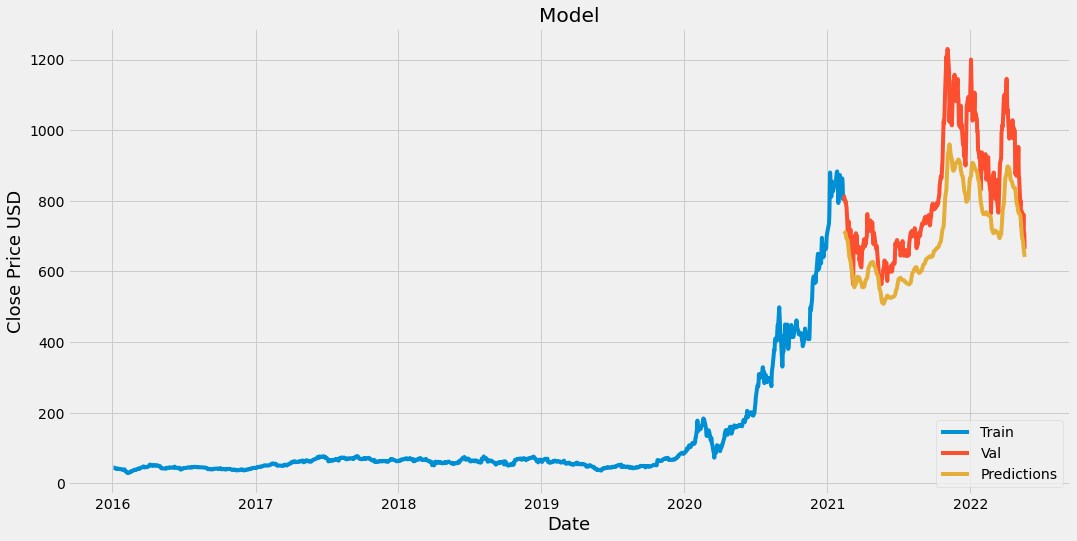

In [78]:
#Plot the data
train=data[:training_data_len]
valid= data[training_data_len:]
valid['Predictions']= predictions
#visualise
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD',fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train','Val','Predictions'],loc='lower right')
plt.show()

In [79]:
#Show the actal and predicted prices
valid

,Close,Predictions
Date,,
2021-02-12,816.119995,713.965210
2021-02-16,796.219971,709.487854
2021-02-17,798.150024,703.941406
2021-02-18,787.380005,698.555237
2021-02-19,781.299988,692.931702
...,...,...
2022-05-16,724.369995,684.389465
2022-05-17,761.609985,670.331726
2022-05-18,709.809998,660.814453


In [80]:
#Get the quote 
end=dt.datetime.now()
start= dt.datetime(2016,1,1)
stocks=['TSLA']
spy_quote = pdr.get_data_yahoo(stocks,start,end)
#create a new data frame
new_df= spy_quote.filter(['Close'])
#get last 60 days data frme nd covert to araays
last_60_days= new_df[-60:].values
#Scale data to be vals bw 0&1
last_60_days_scaled= scaler.transform(last_60_days)
#create empty list
X_test=[]
#append past 60 days 
X_test.append(last_60_days_scaled)
#covert Xdataset to numpy array
X_test= np.array(X_test)
#reshape
X_test =np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
#predeiceted scal price
pred_price = model.predict(X_test)
#undo scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[*********************100%***********************]  1 of 1 completed
[[628.98987]]
